# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sqlalchemy import create_engine
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


In [3]:
# load data from database
engine = create_engine('sqlite:///InsertDatabaseName.db')
df = pd.read_sql_table('clean_table', engine).drop(columns=['id'])
X = df['message'].values
Y = df.drop(columns=['message', 'original', 'genre']).values

### 2. Write a tokenization function to process your text data

In [4]:
def tokenize(text):
    # convert all into lower case
    # Normaize data - remove dashes, puctuation etc.
    pun_regex = r"[^a-zA-Z0-9]"
    #text = text.apply(lambda x: re.sub(pun_regex, " ", x))
    text = re.sub(pun_regex, " ", text)
    # Remove all urls users may have left
    url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    #text = text.apply(lambda x: re.sub(url_regex, '', x))
    text = re.sub(url_regex, " ", text)

    #tokens = text.apply(lambda x: word_tokenize(x))
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    
    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)
    return clean_tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [5]:
pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer=tokenize)),
        ('tfidf', TfidfTransformer()),
        ('clf', MultiOutputClassifier(LogisticRegression()))
        ])


### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# train classifier
pipeline.fit(X_train, y_train)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
           n_jobs=1))])

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

related
             precision    recall  f1-score   support

          0       0.75      0.42      0.54      1191
          1       0.84      0.96      0.90      4022

avg / total       0.82      0.84      0.81      5213



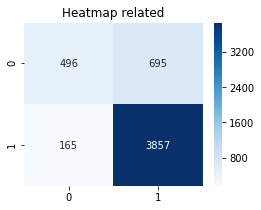

Accuracy: 0.830091533181

request
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      4320
          1       0.83      0.58      0.68       924

avg / total       0.90      0.90      0.90      5244



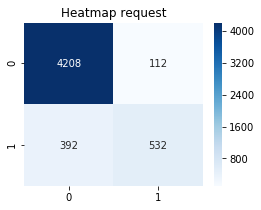

Accuracy: 0.903890160183

offer
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      5221
          1       0.00      0.00      0.00        23

avg / total       0.99      1.00      0.99      5244



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


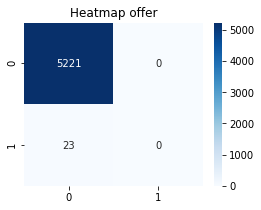

Accuracy: 0.995614035088

aid_related
             precision    recall  f1-score   support

          0       0.78      0.86      0.82      2985
          1       0.78      0.67      0.72      2259

avg / total       0.78      0.78      0.78      5244



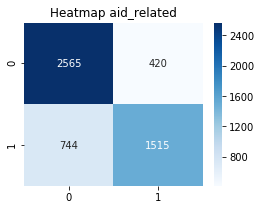

Accuracy: 0.778032036613

medical_help
             precision    recall  f1-score   support

          0       0.93      0.99      0.96      4797
          1       0.69      0.18      0.29       447

avg / total       0.91      0.92      0.90      5244



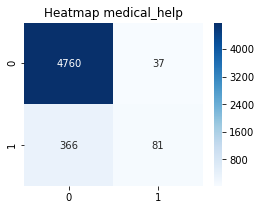

Accuracy: 0.923150266972

medical_products
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      4988
          1       0.78      0.20      0.31       256

avg / total       0.95      0.96      0.95      5244



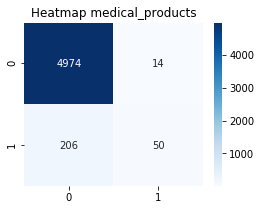

Accuracy: 0.958047292143

search_and_rescue
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      5097
          1       0.62      0.03      0.06       147

avg / total       0.96      0.97      0.96      5244



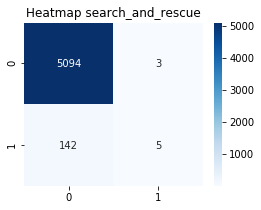

Accuracy: 0.97234935164

security
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      5150
          1       0.00      0.00      0.00        94

avg / total       0.96      0.98      0.97      5244



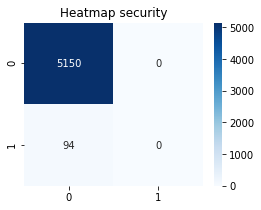

Accuracy: 0.982074752098

military
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      5060
          1       0.78      0.11      0.20       184

avg / total       0.96      0.97      0.96      5244



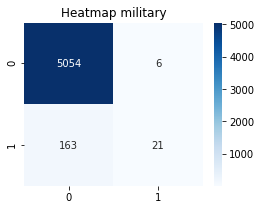

Accuracy: 0.967772692601

water
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      4895
          1       0.81      0.50      0.62       349

avg / total       0.96      0.96      0.95      5244



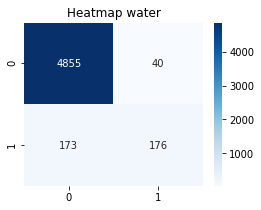

Accuracy: 0.95938215103

food
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      4648
          1       0.85      0.60      0.70       596

avg / total       0.94      0.94      0.94      5244



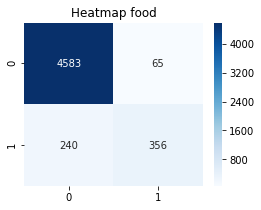

Accuracy: 0.941838291381

shelter
             precision    recall  f1-score   support

          0       0.94      0.99      0.97      4761
          1       0.83      0.42      0.56       483

avg / total       0.93      0.94      0.93      5244



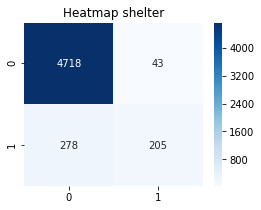

Accuracy: 0.938787185355

clothing
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      5176
          1       0.78      0.21      0.33        68

avg / total       0.99      0.99      0.99      5244



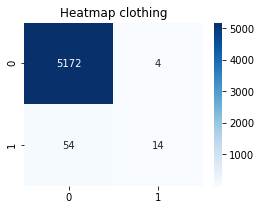

Accuracy: 0.988939740656

money
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      5122
          1       0.82      0.07      0.14       122

avg / total       0.97      0.98      0.97      5244



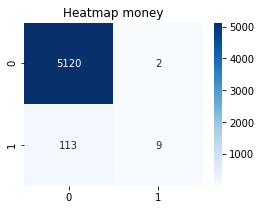

Accuracy: 0.978070175439

missing_people
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      5173
          1       0.00      0.00      0.00        71

avg / total       0.97      0.99      0.98      5244



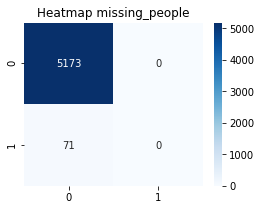

Accuracy: 0.98646071701

refugees
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      5048
          1       0.78      0.11      0.19       196

avg / total       0.96      0.97      0.95      5244



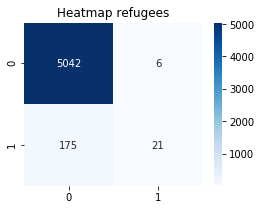

Accuracy: 0.965484363082

death
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      4993
          1       0.93      0.25      0.39       251

avg / total       0.96      0.96      0.95      5244



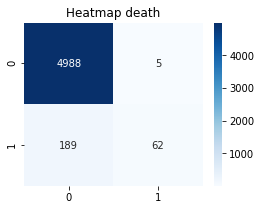

Accuracy: 0.963005339436

other_aid
             precision    recall  f1-score   support

          0       0.88      0.99      0.93      4522
          1       0.62      0.13      0.22       722

avg / total       0.84      0.87      0.83      5244



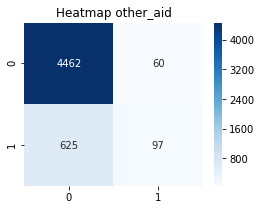

Accuracy: 0.869374523265

infrastructure_related
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      4911
          1       0.75      0.04      0.07       333

avg / total       0.93      0.94      0.91      5244



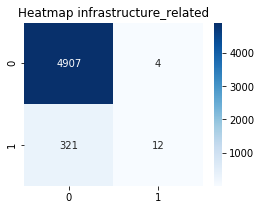

Accuracy: 0.938024408848

transport
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      4998
          1       0.76      0.11      0.20       246

avg / total       0.95      0.96      0.94      5244



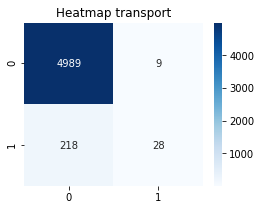

Accuracy: 0.956712433257

buildings
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      4972
          1       0.78      0.18      0.30       272

avg / total       0.95      0.95      0.94      5244



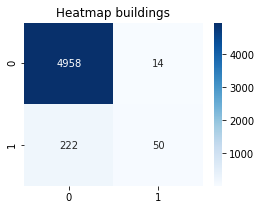

Accuracy: 0.954996186117

electricity
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      5139
          1       0.62      0.08      0.14       105

avg / total       0.97      0.98      0.97      5244



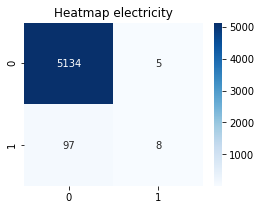

Accuracy: 0.980549199085

tools
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      5211
          1       0.00      0.00      0.00        33

avg / total       0.99      0.99      0.99      5244



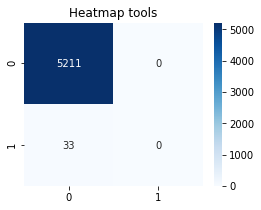

Accuracy: 0.993707093822

hospitals
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      5181
          1       0.00      0.00      0.00        63

avg / total       0.98      0.99      0.98      5244



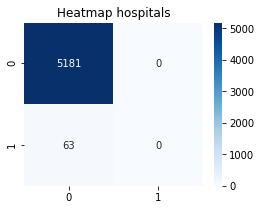

Accuracy: 0.987986270023

shops
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      5216
          1       0.00      0.00      0.00        28

avg / total       0.99      0.99      0.99      5244



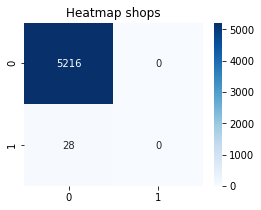

Accuracy: 0.994660564455

aid_centers
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      5173
          1       0.00      0.00      0.00        71

avg / total       0.97      0.99      0.98      5244



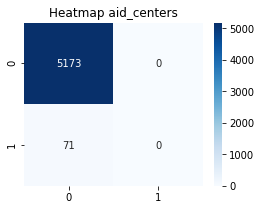

Accuracy: 0.98646071701

other_infrastructure
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      5042
          1       0.50      0.01      0.02       202

avg / total       0.94      0.96      0.94      5244



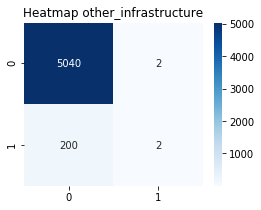

Accuracy: 0.961479786423

weather_related
             precision    recall  f1-score   support

          0       0.88      0.95      0.91      3783
          1       0.84      0.65      0.73      1461

avg / total       0.86      0.87      0.86      5244



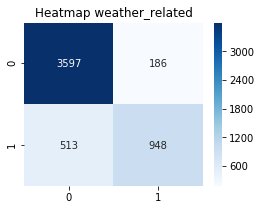

Accuracy: 0.866704805492

floods
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      4782
          1       0.90      0.40      0.55       462

avg / total       0.94      0.94      0.93      5244



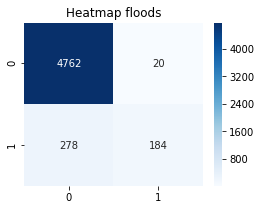

Accuracy: 0.943173150267

storm
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      4755
          1       0.77      0.46      0.57       489

avg / total       0.93      0.94      0.93      5244



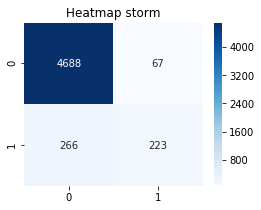

Accuracy: 0.936498855835

fire
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      5195
          1       0.50      0.02      0.04        49

avg / total       0.99      0.99      0.99      5244



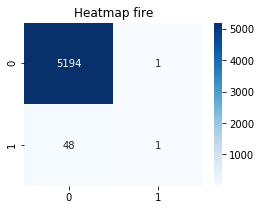

Accuracy: 0.990655987796

earthquake
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      4784
          1       0.89      0.65      0.75       460

avg / total       0.96      0.96      0.96      5244



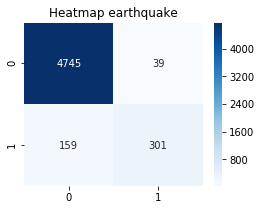

Accuracy: 0.962242562929

cold
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      5139
          1       0.78      0.13      0.23       105

avg / total       0.98      0.98      0.98      5244



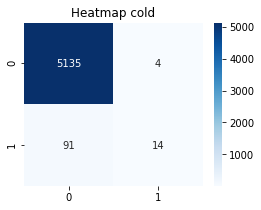

Accuracy: 0.981884057971

other_weather
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      4965
          1       0.76      0.05      0.09       279

avg / total       0.94      0.95      0.93      5244



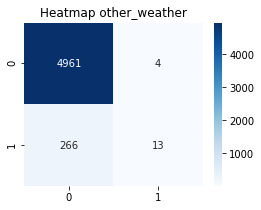

Accuracy: 0.948512585812

direct_report
             precision    recall  f1-score   support

          0       0.88      0.97      0.93      4209
          1       0.80      0.49      0.61      1035

avg / total       0.87      0.87      0.86      5244



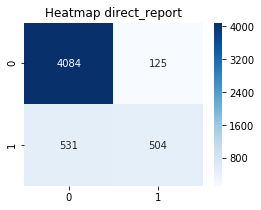

Accuracy: 0.874904652937



In [7]:

def report_summary(y_test, plot=False):
    y_pred = pipeline.predict(X_test)
    for i in range(y_test.shape[1]):
        feature_name = df.drop(columns=["message", "original", "genre"]).columns[i][:-2]
        
        labels = np.unique(y_pred[:, 1])
        cf_matrix = confusion_matrix(y_test[:, i], y_pred[:, i], labels=labels)
        accuracy = (y_pred[:, i] == y_test[:, i]).mean()

        # Creating a seaborn confusion Matrix
        plt.figure(figsize=(4, 3))  
        # Create the heatmap
        sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)
        # Add a title for each heatmap (optional)
        plt.title(f'Heatmap {feature_name}')


        # Creating a report for precision, recall and f1 score
        print('\033[91m' + f'{feature_name}' + '\033[90m')
        print(classification_report(y_test[:,i], y_pred[:,i], labels=labels))
        if plot == True:
            plt.show()
        print("Accuracy:", accuracy)
        print()
        
        
report_summary(y_test, plot=True)

### 6. Improve your model
Use grid search to find better parameters. 

In [8]:
parameters = {
    
    #removing very common words (e.g., "the", "and") may be useful
    'vect__max_df': [0.75, 1.0],
    # Chose not to optimise by rare terms
    #'vect__min_df': [1, 2], £
    
    # Chose not to alter by reducing the count of tokens
    #'vect__max_features': [None, 5000],
    #'vect__ngram_range': [(1, 1), (1, 2)],
    #'tfidf__use_idf': [True, False],
    #'tfidf__smooth_idf': [True, False],
    #'tfidf__sublinear_tf': [True, False],
    #'clf__estimator__penalty': ['l1', 'l2'],
    # Optimise regularisation strength for overfitting
    'clf__estimator__C': [0.01, 0.1, 1.0, 10.0],
    # Different can affect convergence speed and model performance
    'clf__estimator__solver': ['liblinear', 'saga']
    
    'clf__estimator__max_iter': [200, 300]
}


# parameters = {
#     'vect__max_df': [0.75, 1.0],
#     'vect__min_df': [1, 2],
#     'vect__max_features': [None, 5000],
#     'vect__ngram_range': [(1, 1), (1, 2)],
#     'tfidf__use_idf': [True, False],
#     'clf__estimator__penalty': ['l1', 'l2'],
#     'clf__estimator__C': [0.01, 0.1, 1.0, 10.0],
#     'clf__estimator__solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
#     'clf__estimator__max_iter': [200, 300]
# }
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)

SyntaxError: invalid syntax (<ipython-input-8-55f310cc1651>, line 20)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [ ]:
report_summary(y_test, plot=False)

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [ ]:
pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer=tokenize)),
        ('tfidf', TfidfTransformer()),
        ('clf', MultiOutputClassifier(RandomForest()))
        ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(y_test)
metric_summary(y_test, y_pred)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

randomized_search = RandomizedSearchCV(pipeline, parameters, n_iter=100, cv=5, n_jobs=-1)
randomized_search.fit(X_train, y_train)

### 9. Export your model as a pickle file

### 10. Use this notebook to complete `train_classifier.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.